# 习题：P134 7.2题

已知正例点$x_1=(1,2)^T,x_2=(2,3)^T,x_3=(3,3)^T$，负例点$x_4=(2,1)^T,x_5=(3,2)^T$，试求最大间隔分离平面和分类决策函数，并在图中挂出分离超平面、间隔边界及支持向量。

## sklearn.svm.SVC

*(C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=False,tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=None,random_state=None)*

参数：

- C：C-SVC的惩罚参数C，默认值是1.0

C越大，相当于惩罚松弛变量，希望松弛变量接近0，即对误分类的惩罚增大，趋向于对训练集全分对的情况，这样对训练集测试时准确率很高，但泛化能力弱。C值小，对误分类的惩罚减小，允许容错，将他们当成噪声点，泛化能力较强。

- kernel ：核函数，默认是rbf，可以是‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ 
    
    – 线性：u'v
    
    – 多项式：(gamma*u'*v + coef0)^degree

    – RBF函数：exp(-gamma|u-v|^2)

    – sigmoid：tanh(gamma*u'*v + coef0)


- degree ：多项式poly函数的维度，默认是3，选择其他核函数时会被忽略。


- gamma ： ‘rbf’,‘poly’ 和‘sigmoid’的核函数参数。默认是’auto’，则会选择1/n_features


- coef0 ：核函数的常数项。对于‘poly’和 ‘sigmoid’有用。


- probability ：是否采用概率估计？.默认为False


- shrinking ：是否采用shrinking heuristic方法，默认为true


- tol ：停止训练的误差值大小，默认为1e-3


- cache_size ：核函数cache缓存大小，默认为200


- class_weight ：类别的权重，字典形式传递。设置第几类的参数C为weight*C(C-SVC中的C)


- verbose ：允许冗余输出？


- max_iter ：最大迭代次数。-1为无限制。


- decision_function_shape ：‘ovo’, ‘ovr’ or None, default=None3


- random_state ：数据洗牌时的种子值，int值


主要调节的参数有：C、kernel、degree、gamma、coef0。

In [1]:
from sklearn.svm import SVC

### 加载数据

In [2]:
X = [[1, 2], [2, 3], [3, 3], [2, 1], [3, 2]]
y = [1, 1, 1, -1, -1]

## 训练SVM模型

In [3]:
clf = SVC(kernel='linear', C=10000)
clf.fit(X, y)

SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [4]:
print("w =", clf.coef_)
print("b =", clf.intercept_)
print("support vectors =", clf.support_vectors_)

w = [[-1.  2.]]
b = [-2.]
support vectors = [[3. 2.]
 [1. 2.]
 [3. 3.]]


#### 最大间隔分离超平面
$-x^{(1)}+2x^{(2)}-2=0$
#### 分类决策函数
$f(x)=sign(-x^{(1)}+2x^{(2)}-2)$
#### 支持向量
$x_1=(3,2),x_2=(1,2), x_3=(3,3)$

## 绘制分离超平面、间隔边界、支持向量

In [5]:
import matplotlib.pyplot as plt
import numpy as np

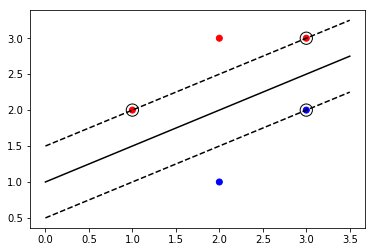

In [6]:
# 绘制数据点
color_seq = ['red' if v==1 else 'blue' for v in y]
plt.scatter([i[0] for i in X], [i[1] for i in X], c=color_seq)
# 得到x轴的所有点
xaxis = np.linspace(0, 3.5)
w = clf.coef_[0]
# 计算斜率
a = -w[0] / w[1]
# 得到分离超平面
y_sep = a * xaxis - (clf.intercept_[0]) / w[1]
# 下边界超平面
b = clf.support_vectors_[0]
yy_down = a * xaxis + (b[1] - a * b[0])
# 上边界超平面
b = clf.support_vectors_[-1]
yy_up = a * xaxis + (b[1] - a * b[0])
# 绘制超平面
plt.plot(xaxis, y_sep, 'k-')
plt.plot(xaxis, yy_down, 'k--')
plt.plot(xaxis, yy_up, 'k--')
# 绘制支持向量
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=150, facecolors='none', edgecolors='k')
plt.show()